#### This code block generates the input data to be used in the small test below. The test has 3 questions, answer first 2 with code.

Import libraries

In [1]:
import numpy as np
import pandas as pd
from scipy.spatial import distance
import matplotlib.pyplot as plt
import time


In [2]:
# Generate 1,000,000 random latitude and longitude pairs
# Latitude ranges from -90 to 90 degrees
# Longitude ranges from -180 to 180 degrees
np.random.seed(42)
latitudes = np.random.uniform(low=-90.0, high=90.0, size=100000)
longitudes = np.random.uniform(low=-180.0, high=180.0, size=100000)

# Combine latitudes and longitudes
lat_lon_pairs = np.column_stack((latitudes, longitudes))

# Display the first 5 pairs as a sample
#lat_lon_pairs[:5]
df_lat_lon = pd.DataFrame(lat_lon_pairs, columns=['lat', 'lon'])

# Display the first 5 rows of the DataFrame to verify
df_lat_lon['ID']=df_lat_lon.index


Solution

In [3]:
df_lat_lon.head(5)

,lat,lon,ID
0,-22.582779,29.080456,0
1,81.128575,9.709794,1
2,41.758910,-53.626698,2
3,17.758527,-2.443443,3
4,-61.916645,-48.565211,4


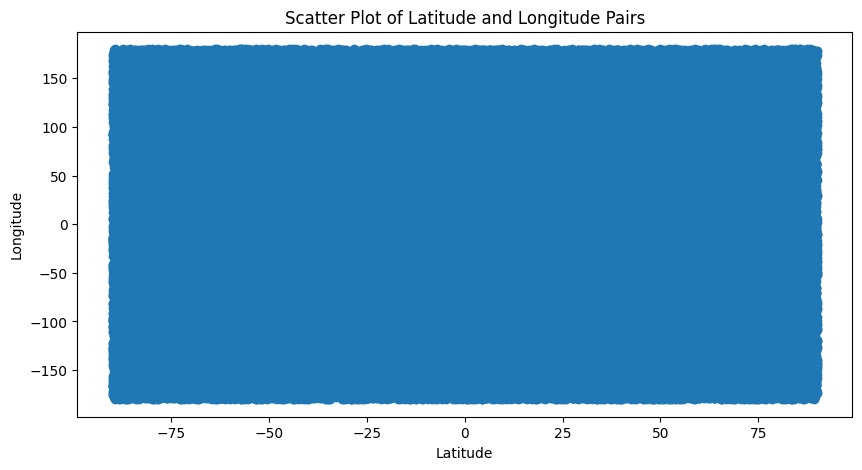

In [4]:
plt.figure(figsize=(10, 5))
plt.scatter(df_lat_lon['lat'], df_lat_lon['lon'])
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Scatter Plot of Latitude and Longitude Pairs')
plt.show()

# Question 1: Create a function, to select for any given point all the points within 1000 meters radius to the points. Randomly choose 5 points, run the function with them and display the results.

**The Haversine Formula**

In essence, this code snippet represents a portion of the following formula:

a = sin²(Δlat/2) + cos(lat1) * cos(lat2) * sin²(Δlon/2)

c = 2 * arcsin(sqrt(a))
distance = R * c

where:

*   Δlat is the difference in latitude
*   Δlon is the difference in longitude
*   lat1 and lat2 are the latitudes of the two points
*   R is the radius of the Earth

In [5]:
def select_nearby_points(lat_lon_pairs, center_point, radius):
  """
  Finds all points within a radius of a center point.

  Args:
    lat_lon_pairs: A numpy array of shape (n, 2) where each row represents a point (latitude, longitude).
    center_point: A numpy array of shape (2,) representing the center point (latitude, longitude).
    radius: A float representing the radius in meters.

  Returns:
    A numpy array of shape (m, 2) where each row represents a neighboring point.
  """

  # Convert coordinates to radians
  lat_rad = np.radians(lat_lon_pairs[:, 0])
  lon_rad = np.radians(lat_lon_pairs[:, 1])
  center_lat_rad = np.radians(center_point[0])
  center_lon_rad = np.radians(center_point[1])

  # Calculate the great-circle distance between each point and the center point
  dlon = lon_rad - center_lon_rad
  dlat = lat_rad - center_lat_rad
  a = np.sin(dlat / 2)**2 + np.cos(lat_rad) * np.cos(center_lat_rad) * np.sin(dlon / 2)**2
  c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
  distance = 6371 * c  # Earth's radius in kilometers

  # Select points within the radius
  return lat_lon_pairs[distance <= radius]

In [6]:
# Randomly choose 5 points
random_indices = np.random.choice(len(lat_lon_pairs), size=5, replace=False)
random_points = lat_lon_pairs[random_indices]

# Run the function with the random points
for point in random_points:
  nearby_points = select_nearby_points(lat_lon_pairs, point, 1000)
  print(f"Nearby points for point {point}:")
  print(nearby_points)

Nearby points for point [  40.22046123 -144.11089618]:
[[  37.23432189 -148.66476637]
 [  40.04138075 -155.27720175]
 [  45.60807335 -153.44287077]
 ...
 [  40.49189678 -142.32130515]
 [  44.36029875 -136.32951552]
 [  40.56588167 -134.46535428]]
Nearby points for point [-33.46972168 -79.82487171]:
[[-37.22206109 -70.54087453]
 [-40.16202333 -76.24555345]
 [-41.26595883 -75.77728514]
 [-40.64126358 -76.63963412]
 [-31.79311882 -69.98480785]
 [-35.00562408 -75.25298762]
 [-33.87309604 -75.30600204]
 [-37.29203339 -76.22893508]
 [-29.78796803 -81.5780294 ]
 [-39.47702121 -82.6447142 ]
 [-36.07817797 -70.16216639]
 [-35.47243698 -82.05280709]
 [-39.9865003  -79.26899122]
 [-41.25486095 -76.71352687]
 [-33.51117452 -81.11757265]
 [-31.44768869 -77.92405647]
 [-26.04244527 -75.02922154]
 [-35.56448797 -69.81097175]
 [-25.34242554 -81.81037667]
 [-30.9276931  -80.79726102]
 [-31.46198467 -78.64703665]
 [-30.54875985 -88.05561993]
 [-31.76452575 -86.67515358]
 [-25.92760078 -77.21628227]
 [-3

# Question 2: Create a function to select for each point (in the 100000 points) all the points within 1000 meters radius to it. Save the result in a dataframe.

In [7]:
# Iterating through 1 data point to check result. Please comment this cell out,
# if you require to run for all points.
for i, j in enumerate({21021: [ 38.37037734 -75.19756815]}):
  print (i,j)

0 21021


In [8]:
def select_nearby_points_for_all(lat_lon_pairs, radius):
  """
  Selects for each point in the lat_lon_pairs array all the points within a given radius.

  Args:
    lat_lon_pairs: A numpy array of latitude and longitude pairs.
    radius: The radius in meters.

  Returns:
    A pandas DataFrame with the ID of the reference point, the latitude and longitude of the reference point, the ID of the nearby point, the latitude and longitude of the nearby point.
  """

  # Create an empty DataFrame to store the results.
  results_df = pd.DataFrame(columns=['ref_id', 'ref_lat', 'ref_lon', 'nearby_id', 'nearby_lat', 'nearby_lon'])

  # Loop through each point in the lat_lon_pairs array.
  # for i, point in enumerate(lat_lon_pairs):
  for i, j in enumerate({21021: [ 38.37037734 -75.19756815]}):
    # Select the nearby points for the current point.
    nearby_points = select_nearby_points(lat_lon_pairs, point, radius)

    # Extract the ID of the reference point.
    ref_id = df_lat_lon.loc[i, 'ID']

    # Extract the latitude and longitude of the reference point.
    ref_lat = point[0]
    ref_lon = point[1]

    # Create a DataFrame for the nearby points of the current point.
    nearby_df = pd.DataFrame(nearby_points, columns=['lat', 'lon'])

    # Add the ID of the reference point to the nearby_df DataFrame.
    nearby_df['ref_id'] = ref_id

    # Add the latitude and longitude of the reference point to the nearby_df DataFrame.
    nearby_df['ref_lat'] = ref_lat
    nearby_df['ref_lon'] = ref_lon

    # Rename the 'lat' and 'lon' columns to 'nearby_lat' and 'nearby_lon'.
    nearby_df.rename(columns={'lat': 'nearby_lat', 'lon': 'nearby_lon'}, inplace=True)

    # Extract the ID of the nearby points.
    nearby_df['nearby_id'] = nearby_df.index

    # Concatenate the current nearby_df DataFrame with the results_df DataFrame.
    results_df = pd.concat([results_df, nearby_df], ignore_index=True)

  return results_df


# Question 3: How much time it takes to run your function for question 2, what is your estimation of the time required for running it on 1000000 points?

In [9]:


# Run the function for question 2
start_time = time.time()
results_df = select_nearby_points_for_all(lat_lon_pairs, 1000)
end_time = time.time()

# Calculate the time taken
time_taken = end_time - start_time

# Print the time taken
print(f"Time taken to run the function for 1 point: {time_taken:.2f} seconds")

# Estimate the time required for 1000000 points
estimated_time = time_taken * 1000000
# minutes = (estimated_time % 3600) // 60

# # Print the estimated time
# print(f"Estimated time to run the function for 1000000 point: {estimated_time:.2f} seconds")


hours = estimated_time // 3600
minutes = (estimated_time % 3600) // 60
seconds = estimated_time % 60

print(f"Estimated time to run the function for 1000000 point: {hours} hours, {minutes} minutes, and {seconds:.2f} seconds")


Time taken to run the function for 1 point: 0.02 seconds
Estimated time to run the function for 1000000 point: 6.0 hours, 22.0 minutes, and 2.04 seconds


# Points on google map

One of the simplest way is to copy your coordinates in Excel file.

Go to My Google Maps.
Find/create the map you want the points to appear on.
In Excel, export your file as CSV
Upload/import the CSV file in My Google Maps.
It will plot all of your points on the map.

In [ ]:
https://www.google.com/maps/d/edit?mid=15UuLdPUmdtvLALfzcjpW7yWfdi3LD_k&ll=4.258634796827113%2C-139.69954853543607&z=3